In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_excel("/Users/indahrahma/Praktikum Data Mining/ipm 2022.xlsx")
dataset.head()

,Kabupaten/Kota,UHH,HLS,RRLS,PPKD
0,Simeulue,65.48,14.08,9.73,7371
1,Aceh Singkil,67.65,14.34,8.69,8994
2,Aceh Selatan,64.64,14.69,8.89,8353
3,Aceh Tenggara,68.48,14.26,9.92,8222
4,Aceh Timur,68.94,13.06,8.32,9127


#### Statistik Deskriptif

In [ ]:
dataset.describe()

,UHH,HLS,RRLS,PPKD
count,514.000000,514.000000,514.000000,514.000000
mean,69.929047,13.088385,8.552374,10643.322957
std,3.408126,1.305754,1.620598,2752.811053
min,55.700000,4.070000,1.580000,4190.000000
25%,67.732500,12.500000,7.640000,8874.250000
50%,70.225000,13.005000,8.410000,10512.500000
75%,72.320000,13.690000,9.455000,12082.500000
max,77.820000,17.810000,13.030000,24221.000000


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo


# Menghitung KMO
kmo_all, kmo_model = calculate_kmo(dataset.iloc[:, 1:])

print(f'KMO All: {kmo_all}')
print(f'KMO Model: {kmo_model}')


KMO All: [0.76431827 0.68475379 0.65185489 0.72590489]
KMO Model: 0.6962901393953596


#### Uji Multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston

# Fungsi untuk menghitung VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Menghitung VIF untuk DataFrame yang dipilih
vif_results = calculate_vif(dataset.iloc[:, 1:])

# Menampilkan hasil VIF
print(vif_results)

  Variable         VIF
0      UHH  129.611541
1      HLS  232.575948
2     RRLS   95.318701
3     PPKD   31.017028


#### Standarisasi data

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler =

# Melakukan rescaling
standarisasi = scaler.fit_transform(dataset.iloc[:, 1:])

In [ ]:
standarisasi

array([[0.44213382, 0.72852984, 0.71179039, 0.15880385],
       [0.54023508, 0.74745269, 0.6209607 , 0.23982827],
       [0.40415913, 0.77292576, 0.63842795, 0.20782787],
       ...,
       [0.4624774 , 0.26200873, 0.14672489, 0.07158904],
       [0.45027125, 0.41994178, 0.14672489, 0.03085218],
       [0.68083183, 0.79839884, 0.88733624, 0.5490989 ]])

In [ ]:
dataset_standarisasi  = pd.DataFrame({'UHH':standarisasi[:,0],'HLS':standarisasi[:,1],
                            'RRLS':standarisasi[:,2],'PPKD':standarisasi[:,3],})
dataset_standarisasi.head()

,UHH,HLS,RRLS,PPKD
0,0.442134,0.728530,0.711790,0.158804
1,0.540235,0.747453,0.620961,0.239828
2,0.404159,0.772926,0.638428,0.207828
3,0.577758,0.741630,0.728384,0.201288
4,0.598553,0.654294,0.588646,0.246468


In [ ]:
# Import library
from numpy import unique
from numpy import where #pelabelan untuk hasil clustering
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans #untuk pemodelan clustering
from matplotlib import pyplot

In [ ]:
dataset_standarisasi.shape

(514, 4)

In [ ]:
dataset_standarisasi.isnull().sum()

UHH     0
HLS     0
RRLS    0
PPKD    0
dtype: int64

In [ ]:
wcss = [] #wcss -> within cluster sum of squares
for i in range (1,15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(dataset_standarisasi)
    wcss.append(kmeans.inertia_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

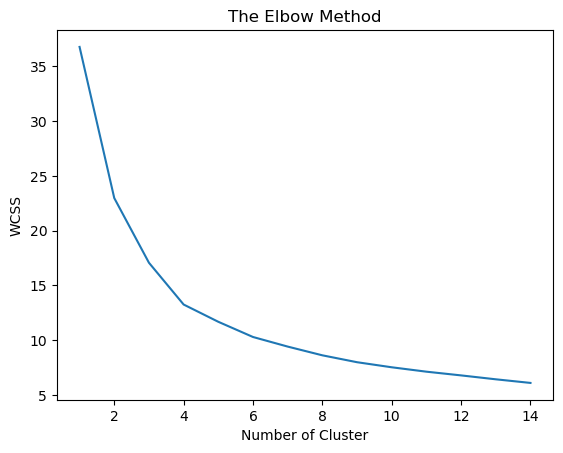

In [ ]:
# Visualisasi Metode Elbow
plt.plot(range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 14)
kmeans.fit(dataset_standarisasi)

KMeans(n_clusters=4, random_state=14)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred = kmeans.fit_predict(dataset_standarisasi)
y_pred

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
hasil_kmeans = dataset_standarisasi.copy()
hasil_kmeans["Cluster"]=kmeans.labels_
hasil_kmeans.head()

,UHH,HLS,RRLS,PPKD,Cluster
0,0.442134,0.728530,0.711790,0.158804,1
1,0.540235,0.747453,0.620961,0.239828,1
2,0.404159,0.772926,0.638428,0.207828,1
3,0.577758,0.741630,0.728384,0.201288,1
4,0.598553,0.654294,0.588646,0.246468,1


In [ ]:
cluster_x = hasil_kmeans["Cluster"].value_counts().index
cluster_x

Int64Index([2, 1, 0, 3], dtype='int64')

In [ ]:
cluster_y = hasil_kmeans["Cluster"].value_counts().values
cluster_y

array([227, 176,  94,  17])

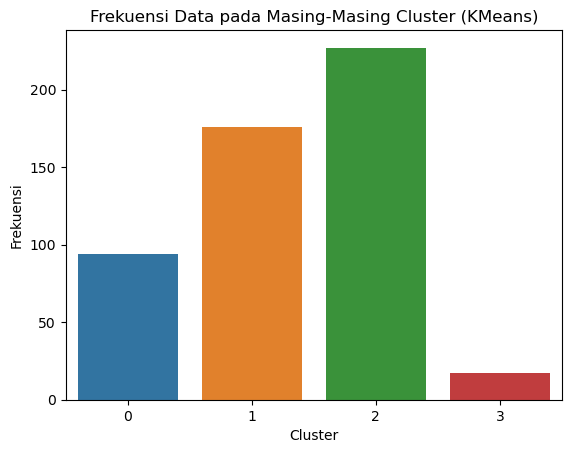

In [ ]:
#Visualisasi
sns.barplot(x = cluster_x, y = cluster_y)
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
ann_kmeans0 = hasil_kmeans[hasil_kmeans["Cluster"] == 0].iloc[:,0]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["Cluster"] == 0].iloc[:,1]

ann_kmeans1 = hasil_kmeans[hasil_kmeans["Cluster"] == 1].iloc[:,0]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["Cluster"] == 1].iloc[:,1]

ann_kmeans2 = hasil_kmeans[hasil_kmeans["Cluster"] == 2].iloc[:,0]
spend_kmeans2 = hasil_kmeans[hasil_kmeans["Cluster"] == 2].iloc[:,1]

ann_kmeans3 = hasil_kmeans[hasil_kmeans["Cluster"] == 3].iloc[:,0]
spend_kmeans3 = hasil_kmeans[hasil_kmeans["Cluster"] == 3].iloc[:,1]

ann_kmeans4 = hasil_kmeans[hasil_kmeans["Cluster"] == 4].iloc[:,0]
spend_kmeans4 = hasil_kmeans[hasil_kmeans["Cluster"] == 4].iloc[:,1]

In [ ]:
# Pusat dari cluster (centroid)
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[0.78675311, 0.76186162, 0.81276596, 0.51520462],
       [0.49813003, 0.64931934, 0.56972509, 0.24222086],
       [0.71589687, 0.64063893, 0.58474117, 0.3245155 ],
       [0.38261887, 0.35580957, 0.21104547, 0.05109433]])

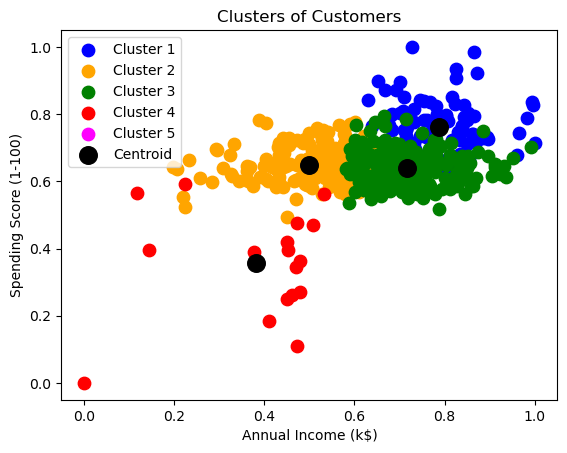

In [ ]:
# Visualisasi hasil Clustering
plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "blue", label = "Cluster 1")
plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "orange", label = "Cluster 2")
plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "green", label = "Cluster 3")
plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_kmeans4, spend_kmeans4, s = 80, c = "magenta", label = "Cluster 5")

# Centroid
plt.scatter(centroid_cluster[:,0], centroid_cluster[:,1], s = 160, c = "black",
           label = "Centroid")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [ ]:
dataset["cluster"] = kmeans.labels_
dataset.head()

,Kabupaten/Kota,UHH,HLS,RRLS,PPKD,cluster
0,Simeulue,65.48,14.08,9.73,7371,1
1,Aceh Singkil,67.65,14.34,8.69,8994,1
2,Aceh Selatan,64.64,14.69,8.89,8353,1
3,Aceh Tenggara,68.48,14.26,9.92,8222,1
4,Aceh Timur,68.94,13.06,8.32,9127,1


In [ ]:
# Jika ingin menyimpan dataframe "dataset" ke dalam format file excel
dataset.to_excel("CLustering_K-Means.xlsx", sheet_name = "K-Means", index = False)